In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('povdata_clean.csv')

In [ ]:
df.head()

,country,is_urban,age,female,married,religion,relationship_to_hh_head,education_level,literate,can_add,...,has_investment,borrowed_for_emergency_last_year,borrowed_for_daily_expenses_last_year,borrowed_for_home_or_biz_last_year,can_call_viaphone,can_text_viaphone,can_use_internet_viaphone,active_bank_user,poverty_probability,Poor
0,C,0,18,1,1,P,Other,1.0,1,1,...,0,0,0,0,1,1,0,1,0.515,1
1,C,1,30,1,1,P,Other,1.0,1,1,...,0,0,0,0,1,0,0,1,0.981,1
2,A,0,20,1,1,Q,Spouse,1.0,1,1,...,0,0,0,0,1,0,0,0,0.982,1
3,A,0,61,0,1,Q,Head,0.0,0,1,...,0,0,0,0,1,0,0,0,0.879,1
4,D,0,26,1,1,X,Spouse,1.0,1,0,...,0,0,0,0,1,1,0,0,0.796,1


In [ ]:
df.columns

Index(['country', 'is_urban', 'age', 'female', 'married', 'religion',
       'relationship_to_hh_head', 'education_level', 'literate', 'can_add',
       'can_divide', 'employed_last_year', 'employment_category_last_year',
       'employment_type_last_year', 'income_own_business_last_year',
       'income_private_sector_last_year', 'income_public_sector_last_year',
       'num_times_borrowed_last_year', 'formal_savings', 'informal_savings',
       'has_insurance', 'has_investment', 'borrowed_for_emergency_last_year',
       'borrowed_for_daily_expenses_last_year',
       'borrowed_for_home_or_biz_last_year', 'can_call_viaphone',
       'can_text_viaphone', 'can_use_internet_viaphone', 'active_bank_user',
       'poverty_probability', 'Poor'],
      dtype='object')

In [ ]:
X = df[['employed_last_year', 'age', 'female', 'married']]
y = df['poverty_probability']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=24)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
print(lm.intercept_)

0.5771725161177195


In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
employed_last_year,-0.021303
age,-0.000230
female,0.021429
married,0.064708


In [ ]:
predictions = lm.predict(X_test)

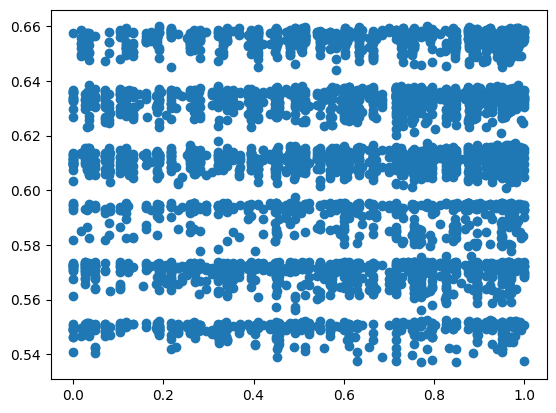

In [ ]:
plt.scatter(y_test,predictions)

<ipython-input-27-5f2bc21c0ef7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50);


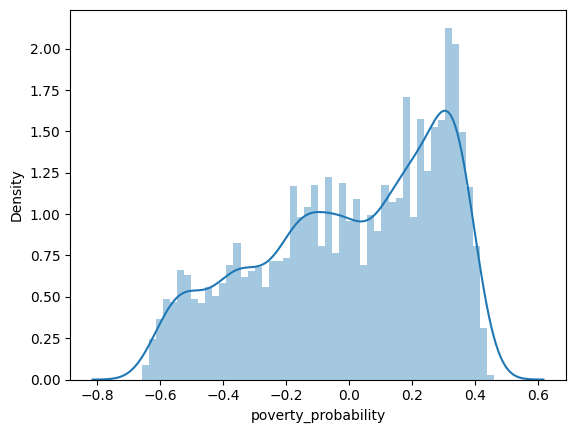

In [ ]:
sns.distplot((y_test-predictions),bins=50);

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.24602873151563226
MSE: 0.0823461340049254
RMSE: 0.2869601610065854
